# Goal

### To develop a methodology for predicting daily emergency department (ED) arrivals. The model will provide information which will do the following: 
   ###  •	 Reduce Employee costs (e.g. Drs, Nurses, PAs, Admin, etc.)
   ###  •    Reduce Drug Inventory costs (e.g. Stocking costs, Cost-of-Carry, etc)
   ###  •	 Reduce other operating costs (e.g. Utilities)


# Methods

### Using Gradient Boost & feature engineering, I will develop a prediction model to forecast the number of emergency department arrivals

# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [5]:
df = pd.read_csv('ED Arrival Data.csv',)

# EDA

In [6]:
df

,Shift Start Date,Day of Week,ED_Hospital_1_Shift1,ED_Hospital_1_Shift2,ED_Hospital_2_Shift1,ED_Hospital_2_Shift2
0,01/01/10,Fri,0.0,23.0,0.0,46.0
1,01/02/10,Sat,66.0,99.0,129.0,173.0
2,01/03/10,Sun,62.0,78.0,120.0,185.0
3,01/04/10,Mon,49.0,90.0,72.0,128.0
4,01/05/10,Tue,38.0,83.0,61.0,152.0
5,01/06/10,Wed,44.0,76.0,78.0,161.0
6,01/07/10,Thu,54.0,66.0,67.0,123.0
7,01/08/10,Fri,43.0,87.0,74.0,150.0
8,01/09/10,Sat,45.0,83.0,97.0,147.0
9,01/10/10,Sun,48.0,70.0,101.0,145.0


In [7]:
df = df.drop(df.index[0]) #Drop the first row

In [8]:
df = df.drop(df.index[[-1,-2]])  #Drop the last 2 rows

In [9]:
df

,Shift Start Date,Day of Week,ED_Hospital_1_Shift1,ED_Hospital_1_Shift2,ED_Hospital_2_Shift1,ED_Hospital_2_Shift2
1,01/02/10,Sat,66.0,99.0,129.0,173.0
2,01/03/10,Sun,62.0,78.0,120.0,185.0
3,01/04/10,Mon,49.0,90.0,72.0,128.0
4,01/05/10,Tue,38.0,83.0,61.0,152.0
5,01/06/10,Wed,44.0,76.0,78.0,161.0
6,01/07/10,Thu,54.0,66.0,67.0,123.0
7,01/08/10,Fri,43.0,87.0,74.0,150.0
8,01/09/10,Sat,45.0,83.0,97.0,147.0
9,01/10/10,Sun,48.0,70.0,101.0,145.0
10,01/11/10,Mon,49.0,79.0,85.0,141.0


In [10]:
df.shape

(1826, 6)

In [11]:
df.columns

Index(['Shift Start Date', 'Day of Week', 'ED_Hospital_1_Shift1',
       'ED_Hospital_1_Shift2', 'ED_Hospital_2_Shift1', 'ED_Hospital_2_Shift2'],
      dtype='object')

In [12]:
df.dtypes

Shift Start Date         object
Day of Week              object
ED_Hospital_1_Shift1    float64
ED_Hospital_1_Shift2    float64
ED_Hospital_2_Shift1    float64
ED_Hospital_2_Shift2    float64
dtype: object

In [13]:
df.describe()

,ED_Hospital_1_Shift1,ED_Hospital_1_Shift2,ED_Hospital_2_Shift1,ED_Hospital_2_Shift2
count,1826.000000,1826.000000,1826.000000,1826.000000
mean,58.903614,105.392662,86.016977,162.841183
std,16.150508,20.528436,21.400505,28.096233
min,16.000000,25.000000,21.000000,33.000000
25%,47.250000,91.000000,71.000000,143.000000
50%,57.000000,104.000000,85.000000,161.000000
75%,68.000000,118.000000,99.000000,180.000000
max,128.000000,204.000000,181.000000,271.000000


In [17]:
from datetime import date
from datetime import datetime
from dateutil.parser import parse
d = date.today()
datetime.combine(d, datetime.min.time())

datetime.datetime(2017, 11, 15, 0, 0)

In [22]:
df["Shift Start Date"] = pd.to_datetime(df["Shift Start Date"])

In [23]:
df.dtypes

Shift Start Date        datetime64[ns]
Day of Week                     object
ED_Hospital_1_Shift1           float64
ED_Hospital_1_Shift2           float64
ED_Hospital_2_Shift1           float64
ED_Hospital_2_Shift2           float64
dtype: object

In [29]:
x = df["Shift Start Date"]

In [30]:
y = df['ED_Hospital_1_Shift1']

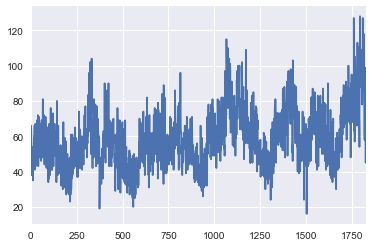

In [47]:
df['ED_Hospital_1_Shift1'].plot()

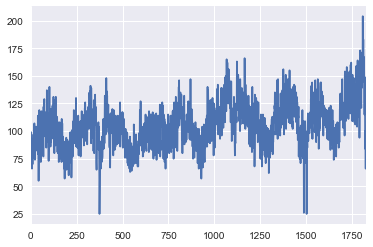

In [51]:
df['ED_Hospital_1_Shift2'].plot()

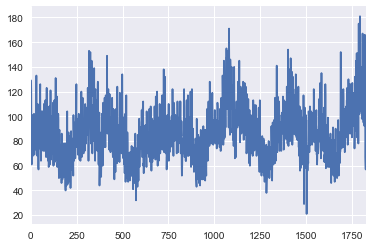

In [52]:
df['ED_Hospital_2_Shift1'].plot()

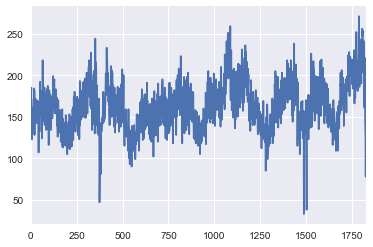

In [53]:
df['ED_Hospital_2_Shift2'].plot()

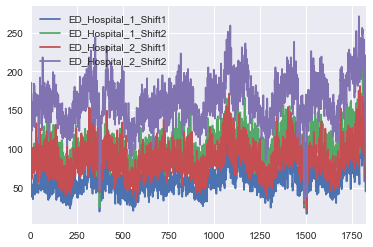

In [48]:
df.plot()

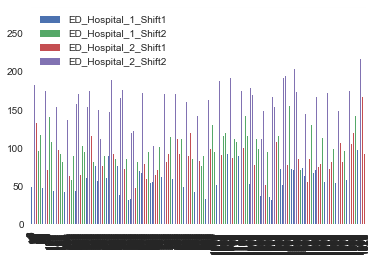

In [55]:
df.plot.bar()